<a href="https://colab.research.google.com/github/reutdayan/ML-KNN/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 5</center></h3>
<h4><center>Despite the option of submitting 5/6 assignments, this assignment is mandatory.<center></h4>

*Your* Name:  
<font color='red'>
Reut Dayan, 206433245
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 3/1/2023

## Part 1 - Neural Network using NumPy

In this part we learn to:
1. Load and preprocess datasets.
2. Implement and train a neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using numpy only.




### **1. Dataset**


Import useful packages

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

Download the MNIST dataset 

In [ ]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
print(X.shape, y.shape)


(70000, 784) (70000,)


Data normalization

In [ ]:
# Min of X for example 0;
min(X[0,:])

0.0

In [ ]:
# norm example
(X[0,:] - min(X[0,:]) / (max(X[0,:]) - min(X[0,:]))).shape

(784,)

In [ ]:
## TODO: Normalize the dataset according to Min-Max normalization.
def min_max_norm(X):
  return np.array([(X[i,:]-min(X[i,:]))/(max(X[i,:])- min(X[i,:])) for i in range (X.shape[0])])

X = min_max_norm(X)
print(X.shape, y.shape)

(70000, 784) (70000,)


Split the data into Train set and Test set

In [ ]:
## TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
size = X.shape[0]
split= int(0.8*size)

X_train, X_test = X[0:split,:], X[split+1:size,:]
y_train, y_test = y[0:split], y[split+1:size]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56000, 784) (13999, 784) (56000,) (13999,)


In [ ]:
## TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
def split_data(X, y, test_size=0.2):
    # Generate random indices for the data
    indices = np.random.permutation(len(X))
    # Split the indices into two sets, one for training and one for testing
    split_idx = int(len(X) * (1 - test_size))
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]
    # Use the indices to split the data into two sets
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = split_data(X, y)

Activation function

In [ ]:
## Here you should Implement the sigmoid activation function and its derivative
def sigmoid(z):
  return 1 / (1+np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

Softmax function

In [ ]:
## Here you should Implement the softmax function
def softmax(z):
  return np.exp(z)/sum(np.exp(z))

def softmax_derivative(z):
  grad =np.zeros((len(z), len(z)))
  for i in range(len(z)):
    for j in range(len(z)):
      if i == j:
        grad[i,j] = softmax(z)[i] * (1-softmax(z))[i]
      else: 
         grad[i,j] = -softmax(z)[i] *softmax(z)[j]
  return np.array(grad)

Loss function

In [ ]:
## Negative Log Likelihood loss function for the multiclass

def nll_loss(y_pred, y):
  loss = -np.sum(y * np.log(y_pred))
  return loss / float(y_pred.shape[0])

Hyper-Parameters

In [ ]:
## Here you should define the main hyper-parameters we discussed about at class.

learning_rate=0.01
num_of_epochs = 100

Parameters initialization 

In [ ]:
## Here you should initialize the parameters. 
## Note that the MNIST dataset has 10 classes.
num_classes = 10
size_input = X.shape[1]
hidden_layer=25
W1 = np.random.randn(size_input,hidden_layer)
b1 = np.random.randn(hidden_layer)
W2 = np.random.randn(hidden_layer,num_classes)
b2 = np.random.randn(num_classes)

### **2. Training**


In [ ]:
def train(X, y, num_of_epochs):

  global W1
  global b1
  global W2
  global b2
  train_size = len(X)

  for epoch in range(num_of_epochs):
    avg_epoch_loss = 0
    for i in range(train_size):
      # Forward propagation
      z1 = W1.T @ X[i,:] + b1   #z1=w1X+b
      h1 = sigmoid(z1)          #h1=sigmaoid(z1)
      Z2 = W2.T @ h1 + b2       #z2=w2h1+b2
      y_hat = softmax(Z2)       #y_hat=softmax(z2)

      # convert y_true to vector with 1 in the answer index.
      y_true = np.zeros(len(y_hat))
      y_true[int(y[i])]=1
      
      # Compute loss
      loss =  nll_loss(y_hat, y_true)
      avg_epoch_loss = avg_epoch_loss + loss

      # Back propagation - compute the gradients of each parameter
      dZ2 = (y_hat - y_true)
      #dZ2 = dy_hat @ softmax_derivative(Z2)
      dW2 =  np.dot(h1[:,None],dZ2[None,:])     #dL/dw2 = dL/dz2 * dz2/dw2
      db2 = dZ2                                 #dL/db2 = dL/dz2 * dz2/db2

      dh1 = W2 @ dZ2                            #dL/dh1 = dL/dz2 * dz2/dh1
      dz1 = dh1 * sigmoid_derivative(z1)        #dL/dz1 = dL/dh1 * dh1/dz1
      dW1 = np.dot(X[i,:][:,None],dz1[None,:])  #dL/dw1 = dL/dz1 * dz1/dw1
      db1 = dz1                                 #dL/db1 = dL/dz1 * dz1/db1

      # Update weights
      W2 = W2 - learning_rate * dW2
      b2 = b2 - learning_rate * db2
      W1 = W1 - learning_rate * dW1
      b1 = b1 - learning_rate * db1

    avg_epoch_loss = (avg_epoch_loss/train_size) 

    print("Epoch:", epoch," Loss:", avg_epoch_loss)
  

### **3. Test**

Here you should test your model

In [ ]:
## Here you should test your model and return the accuracy on the test set

def test(X, y):
  true_pred_counter = 0
  for i in range(len(X)):
    z1 = W1.T @ X[i,:] + b1
    h1 = sigmoid(z1)
    Z2 = W2.T @ h1 + b2
    y_hat = softmax(Z2)
    y_pred = np.argmax(y_hat)
    if (y_pred == int(y[i])):
      true_pred_counter += 1
  accuracy = true_pred_counter/ len(X)
  return accuracy



### **4. Main**

In [ ]:
accuracy = test(X_test, y_test)
print("acuracy before learning", accuracy)

train(X_train, y_train, num_of_epochs)
accuracy = test(X_test, y_test)

print("acuracy after learning", accuracy)

acuracy before learning 0.107
Epoch: 0  Loss: 0.07627826370674402
Epoch: 1  Loss: 0.04268855066345414
Epoch: 2  Loss: 0.03546286731117028
Epoch: 3  Loss: 0.03150471049055818
Epoch: 4  Loss: 0.028848569982526162
Epoch: 5  Loss: 0.026873411828963103
Epoch: 6  Loss: 0.02534846608140144
Epoch: 7  Loss: 0.024118174559877758
Epoch: 8  Loss: 0.023094715141954648
Epoch: 9  Loss: 0.02221942329103419
Epoch: 10  Loss: 0.02144348254519497
Epoch: 11  Loss: 0.020739911617565675
Epoch: 12  Loss: 0.020093319380398676
Epoch: 13  Loss: 0.019505555885007637
Epoch: 14  Loss: 0.01897411091922832
Epoch: 15  Loss: 0.018487295454084094
Epoch: 16  Loss: 0.018037404638102276
Epoch: 17  Loss: 0.017618894427651795
Epoch: 18  Loss: 0.017227864404411625
Epoch: 19  Loss: 0.01686256909962049
Epoch: 20  Loss: 0.016518187470078438
Epoch: 21  Loss: 0.016191983084612848
Epoch: 22  Loss: 0.015883545796719706
Epoch: 23  Loss: 0.015589081325539919
Epoch: 24  Loss: 0.01530444594405904
Epoch: 25  Loss: 0.015026907198130282
Ep

## Part 2 - Neural Network in PyTorch

____________

In this part we learn to:
1. Load and preprocess datasets using pytorch.
2. Implement and train a neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using Pytorch.
3. Implement and train a convolutional neural network (CNN) on MNIST.

### **1. Setup**
Before running code on Colab:
- Go to "Runtime" -> "Change runtime type", and make sure to choose "GPU" for Hardware accelerator.
- Check your Python version at the command line by running "!python --version". It should be Python 3.6 by default.
- Upload all files of this assignment (code and datasets) to your Drive (e.g "machine_learning_intro/assignments/assignment5") and mount that data to the machine. See the next cell below.  
In principle, it is also possible to upload files to the local disk of the colab machines. However, such files will be deleted when the machine is restarted (not a frequent event).

In [ ]:
# check python version
!python --version

Python 3.8.16


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the code and datasets.
# Recommended path: 'machine_learning_intro/assignments/assignment5/'
FOLDERNAME = 'machine_learning_intro/assignments/'
ASSIGNMENTNAME = 'assignment5'

%cd drive/My\ Drive
%cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


### **2. Dataset**

In this exercise, we are going to build a neural network that identify handwritten digits. We will use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels and there are 10 different digits. The network will take these images and predict the digit in them.





Let's visualize the data before working with it.  
1. We can use the "torchvision" package to download the trainset. Set ```transform``` as to be the transform function below (It normalizes each image) and ```train=True```.
2. We use torch.utils.data.DataLoader to load the data. Set ```batch_size=64```.

In [ ]:
# load packages
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
data_path = "./MNIST_data"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the data
mnist_data = datasets.MNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Using the ```mnist_data``` (dataset) and ```mnist dataloader``` (batch dataloader):
1. Print the number of samples in the whole dataset.
2. Print the number of samples in a single batch.
3. Print the shape of images in the data. 
4. Print the number of labels in the dataset (targets).
5. Plot 3 random images using matplotlib (```plt.imshow```) and print their labels.

In [ ]:
# get single batch
dataiter = iter(mnist_dataloader)
batch_images, batch_labels = next(dataiter)

# 1. Print the number of samples in the whole dataset.
print(len(mnist_data))


# 2. Print the number of samples in a single batch.
print(len(batch_images))

# 3. Print the shape of images in the data (image dimensions).
print(batch_images[0].shape)

# 4. Print the number of labels in the whole dataset (using the targets in the dataloader).
print(len(torch.unique(mnist_dataloader.dataset.targets)))

60000
64
torch.Size([1, 28, 28])
10


Labels: tensor([9, 2, 3])


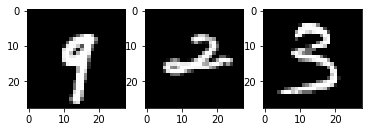

In [ ]:
# 5. plot three images and print their labels
idx = np.random.choice(range(64),3) # three rundom indices
plt.subplot(1,3,1)
plt.imshow(batch_images[idx[0]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(batch_images[idx[1]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(batch_images[idx[2]].numpy().squeeze(), cmap='Greys_r')
print("Labels:",batch_labels[idx])

### **3. Neural Network - Architecture**

In the next section, we are going to implement a neural network with pytorch that gets mnist images and recognize the digit in them.  

Network Architecture (see image below): **784 input units**, a hidden layer with **128 units** and a **ReLU activation**, then a hidden layer with **64 units** and a **ReLU activation**, and finally an **output layer** with a **log-softmax activation**.

Note: Since simple neural networks get vectors as inputs, and not images (unlike CNNs), we should flatten the data. Each sample with shape (28,28) becomes (784,). That is why the input layer has 784 units.  


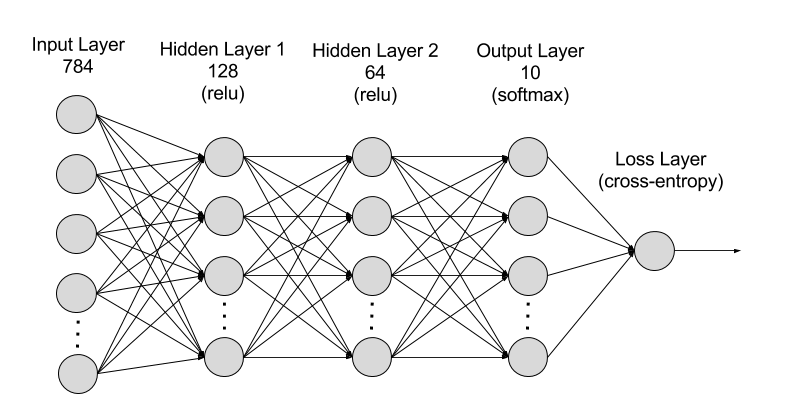

Complete the code below: The constructor (```__init___```) should contain defenitions of layers like ```Linear``` or ```Relu```. The ```forward``` function should contain the logic between the layers declared in the constructor.  

For this section, as well as the next section, you can follow online tutorials (like **[this tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)** or **[this one](https://www.marktechpost.com/2019/11/09/create-a-neural-network-with-pytorch/)**) to understand how to implement neural networks with pytorch.

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        '''
        Declare layers for the model
        '''
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        ''' Forward pass through the network, returns log_softmax values '''
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return self.softmax(logits)

model = NeuralNetwork()

Now that we have a network, let's see what happens when we pass in an image.  
Let's choose a random image and pass it through the network. It should return a prediction - confidences for each class. The class with the highest confidence is the prediction of the model for that image.   
We visualize the results using ```view_classify``` function below.

In [ ]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    image - the input image to the network
    ps - the class confidences (network output)
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [ ]:
def random_prediction_example(data_loader, model):
  '''
  The function sample an image from the data, pass it through the model (inference)
  and show the prediction visually. It returns the predictions confidences.
  '''
  # take a batch and randomly pick an image
  dataiter = iter(data_loader)
  images, labels = next(dataiter)
  images.resize_(64, 1, 784)
  img = images[0]

  # Forward pass through the network
  # we use torch.no_grad() for faster inference and to avoid gradients from
  # moving through the network.
  with torch.no_grad():
      ps = model(img)
      # the network outputs log-probabilities, so take exponential for probabilities
      ps = torch.exp(ps)
  
  # visualize image and prediction
  view_classify(img.view(1, 28, 28), ps)
  return ps

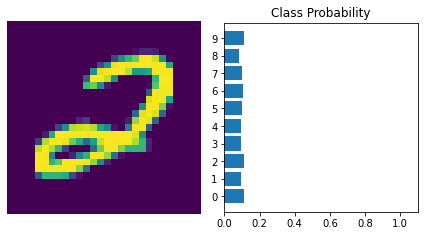

In [ ]:
# you can run this cell multiple times for different images
preds_conf = random_prediction_example(mnist_dataloader, model)

Print the prediction of the network for that sample:

In [ ]:
print(np.argmax(preds_conf))

tensor(0)


### **4. Neural Network - Training**

We can now train and evaluate our network.
1. Split the dataset into a training set and a validation set. Train-set size: 80% of the total data. Val-set size: the rest (20%).
2. Create a dataloader for each set (```train_loader``` and ```val_loader```, see Section 2 for examples).
3. Choose hyperparameters (for now we choose ```learning_rate=0.003``` and ```num_epochs=5```).
4. Use SGD (Stochastic Gradient Descent) as the optimizer.
5. Since it is a multi-class classification task, use "negative log-likelihood loss" as the loss criterion.
6. Train your model on the train-set and evaluate it on the validation-set. 
7. During training, for each epoch, track the training loss and validation loss.

In [ ]:
from torch.utils import data

In [ ]:
# 1. split trainset into train and validation (use torch.utils.data.random_split())
train_size = int(0.8 * len(mnist_data))
test_size = len(mnist_data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(mnist_data, [train_size, test_size])

# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# 3. set hyper parameters
learning_rate = 0.003
nepochs = 5

In [ ]:
model = NeuralNetwork()

# 4. create sgd optimizer. It should optimize our model parameters with
#    learning_rate defined above
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 5. create a criterion object. It should be negative log-likelihood loss since the task
#    is a multi-task classification (digits classification)

criterion = nn.NLLLoss()

In [ ]:
optimizer.param_groups[0]['params'][0].shape

torch.Size([128, 784])

In [ ]:
# images,labels = next(iter(train_loader))
# model.train()
# print(model.linear_relu_stack[0].weight)
# optimizer.zero_grad()
# pred = model(images)
# loss = criterion(pred, labels)
# loss.backward()
# optimizer.step()
# print(model.linear_relu_stack[0].weight)

In [ ]:
# 6.1. Train the model. (Fill empty code blocks)
def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  '''
  Train a pytorch model and evaluate it every epoch.
  Params:
  model - a pytorch model to train
  optimizer - an optimizer 
  criterion - the criterion (loss function)
  nepochs - number of training epochs
  train_loader - dataloader for the trainset
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array. 
                                Should be True for Neural Networks
                                but False for Convolutional Neural Networks.
  '''
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode

          optimizer.zero_grad()
          pred = model(images)
          loss = criterion(pred, labels)
          # Backpropagation
          loss.backward()
          optimizer.step()

          #print(loss.item())
          running_loss += loss.item()
      else:
          val_loss = 0
          # 6.2 Evalaute model on validation at the end of each epoch.
          with torch.no_grad():
              for images, labels in val_loader:
                  if is_image_input:
                    # Flatten MNIST images into a 784 long vector
                    images = images.view(images.shape[0], -1)
              
                  model.eval()
                  pred = model(images)
                  val_loss = criterion(pred, labels)
                  running_val_loss += val_loss.item()
          
          # 7. track train loss and validation loss
          train_losses.append(running_loss/len(train_loader))
          val_losses.append(running_val_loss/len(val_loader))

          print("Epoch: {}/{}.. ".format(e+1, nepochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
  return train_losses, val_losses

In [ ]:
  # 6.1. Train the model.
  ## NOTE: Do not run this cell continuously without running the two cells above!
  ##       Otherwise, you might train a model you have already trained.
  ##       So make sure to run the two cells above (to first initialize the model
  ##       and optimizer), every time, before running this cell!
train_losses, val_losses = train_model(model, optimizer, criterion, nepochs,
                                       train_loader, val_loader, is_image_input=True)

Epoch: 1/5..  Training Loss: 2.104..  Validation Loss: 1.738.. 
Epoch: 2/5..  Training Loss: 1.225..  Validation Loss: 0.844.. 
Epoch: 3/5..  Training Loss: 0.685..  Validation Loss: 0.568.. 
Epoch: 4/5..  Training Loss: 0.515..  Validation Loss: 0.465.. 
Epoch: 5/5..  Training Loss: 0.442..  Validation Loss: 0.414.. 


If you implemented everything correctly, you should see the training loss drop with each epoch.

8. Plot train loss and validation loss as a function of epoch. **On the same graph!**

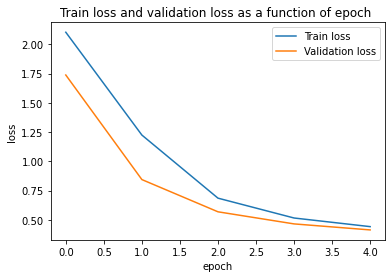

In [ ]:
# plot train and validation loss as a function of #epochs
fig = plt.figure(1)
plt.plot(list(range(0, nepochs)), train_losses, label = "Train loss") # plot first line
plt.plot(list(range(0, nepochs)), val_losses, label = "Validation loss") # plot second line
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train loss and validation loss as a function of epoch ')
plt.legend()
plt.show()

With the network trained, we can check out it's predictions:

tensor([[0.0062, 0.0027, 0.0022, 0.0033, 0.0915, 0.7753, 0.0449, 0.0010, 0.0505,
         0.0224]])

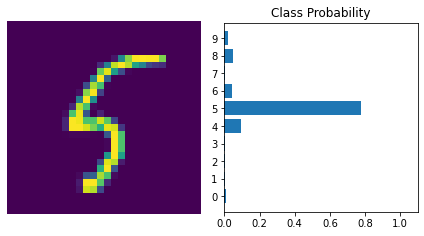

In [ ]:
# you can run this cell multiple times for different images
random_prediction_example(mnist_dataloader, model)

Calculate the model's accuracy on the validation-set.

In [ ]:
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      for images, labels in val_loader:
          if is_image_input:
            # flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          log_ps = model(images)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)
          
          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

In [ ]:
print(f"Validation accuracy: {evaluate_model(model, val_loader, is_image_input=True)}")

Validation accuracy: 0.8848333358764648


### **5. Convolutional Neural Networks**

In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  

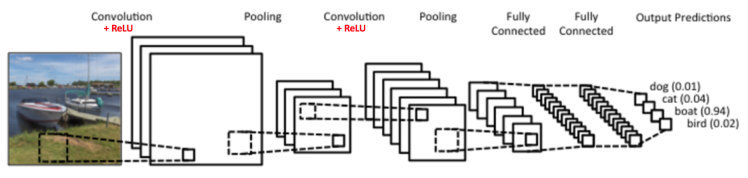

Reminder:  
Go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed. 

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**Q1:** Given an image with shape [1,28,28], what will be the shape of the output of a convolution layer with 10 5x5 kernels (filters) without padding?

**A1:**
<font color='red'>
[1,24,24] 
</font>

**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,28,28]. What should be the padding?

**A2:** 
<font color='red'>
padding = 2 
</font>

**Q3:** Given an image with width $W_{in}$, height $H_{in}$, and a convolution layer with padding $P$, stride $S$ and filter size $F$. Write a formula for the width $W_{out}$ and a formula for the height $H_{out}$ of the convolution's output.   
(In other words, what will be the width and the height of the output?).

**A3:** 
</br>
<font color='red'>
$W_{out} = (W_{in} - F + 2P)/S + 1$
</br>
$H_{out} = (H_{in} - F + 2P)/S + 1$
</font>

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [ ]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__() 
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu 
        x = self.conv2(x) # conv 2
        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


We can now train the model on the train set.

In [ ]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.01

In [ ]:
# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 1.457..  Validation Loss: 0.358.. 
Epoch: 2/3..  Training Loss: 0.245..  Validation Loss: 0.179.. 
Epoch: 3/3..  Training Loss: 0.159..  Validation Loss: 0.130.. 


In [ ]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.9613333344459534


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within 3 epochs only!) :)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set. 

You should consider changing:
1. Prepocess:
  - Change normalization
  - Better representation of the data

1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

1. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs



In [ ]:
## Prepocess


In [ ]:
## Find network and hyperparams that achieve best validation accuracy as possible
# set hyperparameters
cnn_nepochs = 10
cnn_learning_rate = 0.01

In [ ]:
# save the best model in this variable
class BestConvolutionalNet(nn.Module):
    def __init__(self):
      super(BestConvolutionalNet, self).__init__() 
      self.conv1 = nn.Conv2d(1, 32,kernel_size= 5)  # chnl-in, out, krnl
      self.conv2 = nn.Conv2d(32, 64,kernel_size= 5)
      self.fc1 = nn.Linear(1024, 512)   # [64*4*4, x]
      self.fc2 = nn.Linear(512, 256)
      self.fc3 = nn.Linear(256, 10)     # 10 classes
      self.pool1 = nn.MaxPool2d(2, stride=2)
      self.pool2 = nn.MaxPool2d(2, stride=2)
      self.drop1 = nn.Dropout(0.25)
      self.drop2 = nn.Dropout(0.50)
      self.bn1 = nn.BatchNorm2d(32)
      self.bn2 = nn.BatchNorm2d(64)
    
    def forward(self, x):
      x = self.conv1(x)
      x = self.bn1(x)
      x = F.relu(x)
      x = self.pool1(x)
      x = self.drop1(x)

      x = self.conv2(x)
      x = self.bn2(x)
      x = F.relu(x)
      x = self.pool2(x)
      
      x = x.view(-1,1024)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.drop2(x)
      x = self.fc2(x)
      x = F.relu(x)
      x = self.fc3(x)
      return F.log_softmax(x, dim=1) #output


best_model = BestConvolutionalNet()
print(best_model)

BestConvolutionalNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.25, inplace=False)
  (drop2): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
# Evaluate best model:
# train the conv model
best_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(best_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(best_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(best_model, val_loader, is_image_input=False)}")


Epoch: 1/10..  Training Loss: 1.103..  Validation Loss: 0.331.. 
Epoch: 2/10..  Training Loss: 0.251..  Validation Loss: 0.189.. 
Epoch: 3/10..  Training Loss: 0.165..  Validation Loss: 0.135.. 
Epoch: 4/10..  Training Loss: 0.125..  Validation Loss: 0.117.. 
Epoch: 5/10..  Training Loss: 0.103..  Validation Loss: 0.094.. 
Epoch: 6/10..  Training Loss: 0.090..  Validation Loss: 0.085.. 
Epoch: 7/10..  Training Loss: 0.080..  Validation Loss: 0.083.. 
Epoch: 8/10..  Training Loss: 0.074..  Validation Loss: 0.070.. 
Epoch: 9/10..  Training Loss: 0.067..  Validation Loss: 0.072.. 
Epoch: 10/10..  Training Loss: 0.063..  Validation Loss: 0.071.. 
Validation accuracy: 0.9779166579246521


When you are satisfied with your model performance on the validation set, load the test set given to you (the samples are already normalized), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Upload the file to the "submit" system with this notebook.**

Make sure that each prediction will be printed in a new line.

For Example ("predictions.txt"): 
```
0  
5  
9 
``` 

In [ ]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))
  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=32, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")


In [ ]:
# run this to save test predictions to "predictions.txt"
predict_and_save(best_model, test_path=f"{ASSIGNMENTNAME}/mnist_test.pth", file_name="predictions.txt")